In [1]:
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont
from collections import Counter
from dataclasses import dataclass
import random
import math
from wrdcld.font import get_default_font_path
from wrdcld.rectangle import Rectangle
import numpy as np

In [12]:
img = Image.new('RGB', (500,500), color = (73, 109, 137))
canvas = ImageDraw.Draw(img)

text = "hello"
size = 30

font = ImageFont.truetype(get_default_font_path(), size)

bbox = font.getbbox(text)

text_dims = (bbox[2] - bbox[0], 2*(bbox[3] - bbox[1]))

tmp_img = Image.new('RGB', text_dims,color = (0,0,0))
tmp_canvas = ImageDraw.Draw(tmp_img)




tmp_canvas.text(
    (0,0), 
    text,
    fill=(255,255,255),
    font=font,
)

img_data = np.array(tmp_img)[:,:,0]

img_data[0,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

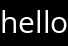

In [13]:
tmp_img

In [14]:
img_data.shape

(46, 68)

In [15]:
completed_rectangles = []
active_rectangles = [Rectangle(x=0,y=0, width=img_data.shape[1], height=0)]
base_value = 0
min_rectangle_width = 3
for ind, img_row in enumerate(img_data):

    print(active_rectangles)
    
    new_active_rectangles = []
    for rect in active_rectangles:
        
        # rectangle isn't done yet
        if np.all(img_row[rect.x: rect.x+rect.width] == base_value):
            new_active_rectangles.append(Rectangle(x=rect.x, y=rect.y, width=rect.width, height=rect.height+1))
        elif rect.height == 0:
            continue
        # make the new rectangles
        else:
            completed_rectangles.append(rect)
            # find the new rectangles to start
            new_left = []
            new_right = []
            new_rect_active = False
            for col_ind, val in enumerate(img_row):
                if val == base_value and not new_rect_active:
                    new_rect_active = True
                    new_left.append(col_ind + rect.x)
                elif new_rect_active and val != base_value:
                    new_rect_active = False
                    new_right.append(col_ind + rect.x)
                else:
                    continue

            if new_rect_active:
                new_right.append(rect.x + rect.width)

            for left, right in zip(new_left, new_right, strict=True):
                if right - left < min_rectangle_width:
                    continue
                new_active_rectangles.append(Rectangle(x=left, y=ind, width=right-left, height=0))

    active_rectangles = new_active_rectangles

completed_rectangles.extend(active_rectangles)

[Rectangle(x=0 y=0 w=68 h=0)]
[Rectangle(x=0 y=0 w=68 h=1)]
[Rectangle(x=0 y=0 w=68 h=2)]
[Rectangle(x=0 y=0 w=68 h=3)]
[Rectangle(x=0 y=0 w=68 h=4)]
[Rectangle(x=0 y=0 w=68 h=5)]
[Rectangle(x=0 y=0 w=68 h=6)]
[Rectangle(x=0 y=0 w=68 h=7)]
[Rectangle(x=0 y=0 w=68 h=8)]
[Rectangle(x=0 y=0 w=68 h=9)]
[Rectangle(x=0 y=0 w=68 h=10)]
[Rectangle(x=5 y=10 w=32 h=0), Rectangle(x=41 y=10 w=4 h=0), Rectangle(x=49 y=10 w=19 h=0)]
[Rectangle(x=5 y=10 w=32 h=1), Rectangle(x=41 y=10 w=4 h=1), Rectangle(x=49 y=10 w=19 h=1)]
[Rectangle(x=5 y=10 w=32 h=2), Rectangle(x=41 y=10 w=4 h=2), Rectangle(x=49 y=10 w=19 h=2)]
[Rectangle(x=5 y=10 w=32 h=3), Rectangle(x=41 y=10 w=4 h=3), Rectangle(x=49 y=10 w=19 h=3)]
[Rectangle(x=5 y=10 w=32 h=4), Rectangle(x=41 y=10 w=4 h=4), Rectangle(x=49 y=10 w=19 h=4)]
[Rectangle(x=5 y=10 w=32 h=5), Rectangle(x=41 y=10 w=4 h=5), Rectangle(x=49 y=10 w=19 h=5)]
[Rectangle(x=5 y=10 w=32 h=6), Rectangle(x=41 y=10 w=4 h=6), Rectangle(x=49 y=10 w=19 h=6)]
[Rectangle(x=19 y=17 w=9 

In [16]:
completed_rectangles

[Rectangle(x=0 y=0 w=68 h=10),
 Rectangle(x=5 y=10 w=32 h=6),
 Rectangle(x=49 y=10 w=19 h=6),
 Rectangle(x=41 y=10 w=4 h=35),
 Rectangle(x=80 y=17 w=6 h=28),
 Rectangle(x=90 y=17 w=4 h=28),
 Rectangle(x=98 y=17 w=6 h=28)]

In [17]:
for rectangle in completed_rectangles:
    tmp_canvas.rectangle(rectangle.xyrb)

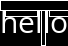

In [18]:
tmp_img

In [9]:
completed_rectangles

[Rectangle(x=0 y=0 w=18 h=10), Rectangle(x=5 y=10 w=13 h=6)]

In [10]:
np.array(tmp_img.getdata())[:,0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 25

In [11]:
img_data.T

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 112, 112,
        112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112,
        112, 112, 112, 112, 112, 112, 112,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   